In [ ]:
#NOT FINAL !!!

import math
import random
import pygame
from pygame.locals import *
from sys import exit
import numpy as np

# Constants
FPS = 120
dt = 1/FPS
altura_caixa = 400
largura_caixa = 400

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False

def resolve_collision(p1, p2):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    for particle_index in range(1, n_particulas + 1):
        massa = 10
        raio = 10
        vel_x = random.uniform(-50, 50)
        vel_y = random.uniform(-50, 50)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance
    return particulas


def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def main():
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(5, largura_caixa, altura_caixa)
    sprites = create_particle_sprites(particles)

    clock = pygame.time.Clock()

    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                exit()

        for particle_name, particle_instance in particles.items():
            for other_particle_name, other_particle_instance in particles.items():
                if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                    resolve_collision(particle_instance, other_particle_instance)

            particle_instance.deslocar()

        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)

if __name__ == "__main__":
    main()


pygame 2.5.1 (SDL 2.28.2, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


Exception in thread Thread-3:
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Program Files\Python39\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\gustavo220061\AppData\Local\Temp\ipykernel_26700\818296554.py", line 139, in tkinter_thread
  File "C:\Program Files\Python39\lib\tkinter\__init__.py", line 1320, in update_idletasks
    self.tk.call('update', 'idletasks')
_tkinter.TclError: can't invoke "update" command: application has been destroyed


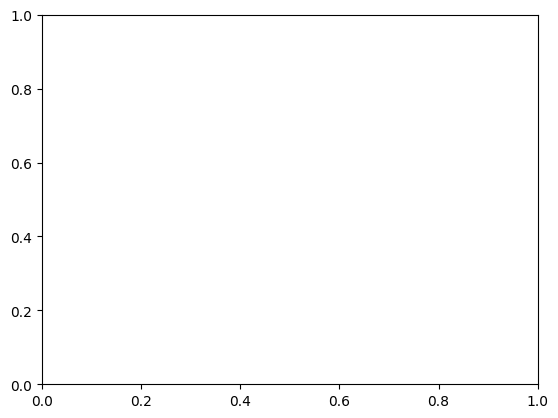

In [1]:
import tkinter as tk
import random
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pygame
from pygame.locals import *
from sys import exit
import numpy as np
import threading

# Constants
FPS = 120
dt = 1/FPS
altura_caixa = 400
largura_caixa = 400

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False

def resolve_collision(p1, p2):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    for particle_index in range(1, n_particulas + 1):
        massa = 10
        raio = 10
        vel_x = random.uniform(-50, 50)
        vel_y = random.uniform(-50, 50)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance
    return particulas

def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def pygame_thread():
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(5, largura_caixa, altura_caixa)
    sprites = create_particle_sprites(particles)

    clock = pygame.time.Clock()

    running = True

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                running = False

        if not running:
            break

        for particle_name, particle_instance in particles.items():
            for other_particle_name, other_particle_instance in particles.items():
                if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                    resolve_collision(particle_instance, other_particle_instance)

            particle_instance.deslocar()

        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)

def tkinter_thread():
    root = tk.Tk()
    root.title("Real-Time Bar Plot")

    # Create a subplot for the speed bar plot
    speed_fig, speed_ax = plt.subplots()
    speed_canvas = FigureCanvasTkAgg(speed_fig, master=root)
    speed_canvas.get_tk_widget().pack()

    running = True

    while running:
        # You can add tkinter-related code here as needed
        root.update_idletasks()
        root.update()

if __name__ == "__main__":
    # Create and start the Pygame thread
    pygame_thread_instance = threading.Thread(target=pygame_thread)
    pygame_thread_instance.daemon = True
    pygame_thread_instance.start()

    # Start the tkinter thread
    tkinter_thread_instance = threading.Thread(target=tkinter_thread)
    tkinter_thread_instance.daemon = True
    tkinter_thread_instance.start()

    # Wait for both threads to finish (e.g., when you close the tkinter window)
    pygame_thread_instance.join()
    tkinter_thread_instance.join()


In [1]:
import tkinter as tk
import random
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pygame
from pygame.locals import *
from sys import exit
import numpy as np
import threading

# Constants
FPS = 120
dt = 1/FPS
altura_caixa = 400
largura_caixa = 400

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False

def resolve_collision(p1, p2):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    for particle_index in range(1, n_particulas + 1):
        massa = 10
        raio = 10
        vel_x = random.uniform(-50, 50)
        vel_y = random.uniform(-50, 50)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance
    return particulas

def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def pygame_thread():
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(5, largura_caixa, altura_caixa)
    sprites = create_particle_sprites(particles)

    clock = pygame.time.Clock()

    running = True

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                running = False

        if not running:
            break

        for particle_name, particle_instance in particles.items():
            for other_particle_name, other_particle_instance in particles.items():
                if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                    resolve_collision(particle_instance, other_particle_instance)

            particle_instance.deslocar()

        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)

def tkinter_thread(particles):
    root = tk.Tk()
    root.title("Real-Time Bar Plot")

    # Create a subplot for the speed bar plot
    speed_fig, speed_ax = plt.subplots()
    speed_canvas = FigureCanvasTkAgg(speed_fig, master=root)
    speed_canvas.get_tk_widget().pack()

    running = True

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                running = False

        if not running:
            break

        # Calculate speed data continuously
        speed_data = [math.sqrt(p.vel_x**2 + p.vel_y**2) for p in particles.values()]

        # Update the speed bar plot
        speed_ax.clear()
        speed_ax.bar(particles.keys(), speed_data, color='blue')
        speed_ax.set_xlabel('Particles')
        speed_ax.set_ylabel('Speed')
        speed_ax.set_title('Particle Speeds')
        speed_canvas.draw()

        # You can add tkinter-related code here as needed
        root.update_idletasks()
        root.update()

if __name__ == "__main__":
    # Create and start the Pygame thread
    pygame_thread_instance = threading.Thread(target=pygame_thread)
    pygame_thread_instance.daemon = True
    pygame_thread_instance.start()

    particles = gerar_particula(5, largura_caixa, altura_caixa)  # Create particles here

    # Start the tkinter thread and pass the particles as an argument
    tkinter_thread_instance = threading.Thread(target=tkinter_thread, args=(particles,))
    tkinter_thread_instance.daemon = True
    tkinter_thread_instance.start()

    # Wait for both threads to finish (e.g., when you close the tkinter window)
    pygame_thread_instance.join()
    tkinter_thread_instance.join()

pygame 2.5.1 (SDL 2.28.2, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


Exception ignored in: <function Image.__del__ at 0x000002025322D0D0>
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\tkinter\__init__.py", line 4017, in __del__
    self.tk.call('image', 'delete', self.name)
RuntimeError: main thread is not in main loop


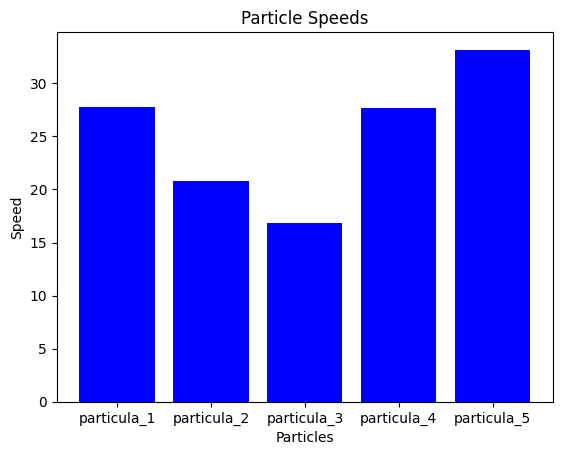

In [2]:
import tkinter as tk
import random
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pygame
from pygame.locals import *
import numpy as np

# Constants
FPS = 120
dt = 1/FPS
altura_caixa = 400
largura_caixa = 400

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False

def resolve_collision(p1, p2):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    for particle_index in range(1, n_particulas + 1):
        massa = 10
        raio = 10
        vel_x = random.uniform(-50, 50)
        vel_y = random.uniform(-50, 50)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance
    return particulas

def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def main():
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(5, largura_caixa, altura_caixa)
    sprites = create_particle_sprites(particles)

    clock = pygame.time.Clock()

    root = tk.Tk()
    root.title("Real-Time Bar Plot")

    # Create a subplot for the speed bar plot
    speed_fig, speed_ax = plt.subplots()
    speed_canvas = FigureCanvasTkAgg(speed_fig, master=root)
    speed_canvas.get_tk_widget().pack()

    running = True

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                running = False

        if not running:
            break

        for particle_name, particle_instance in particles.items():
            for other_particle_name, other_particle_instance in particles.items():
                if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                    resolve_collision(particle_instance, other_particle_instance)
                    
        # Calculate speed data continuously
        speed_data = [math.sqrt(p.vel_x**2 + p.vel_y**2) for p in particles.values()]

        # Update the speed bar plot
        speed_ax.clear()
        speed_ax.bar(particles.keys(), speed_data, color='blue')
        speed_ax.set_xlabel('Particles')
        speed_ax.set_ylabel('Speed')
        speed_ax.set_title('Particle Speeds')
        speed_canvas.draw()

        for particle_instance in particles.values():
            particle_instance.deslocar()

        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)

        # You can add tkinter-related code here as needed
        root.update_idletasks()
        root.update()

    root.mainloop()

if __name__ == "__main__":
    main()
